# Import Packages & Load Dataset from Kaggle

In [70]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

random_state = 42

import warnings
warnings.filterwarnings('ignore')

In [71]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("blastchar/telco-customer-churn")

print("Path to dataset files:", path)
df = pd.read_csv(path + "/WA_Fn-UseC_-Telco-Customer-Churn.csv")

Path to dataset files: C:\Users\naila\.cache\kagglehub\datasets\blastchar\telco-customer-churn\versions\1


# Exploratory Data Analysis

In [72]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [73]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [74]:
df.drop(columns=['customerID'], inplace=True)

df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

In [75]:
df[df['TotalCharges'].isna()][['tenure','MonthlyCharges','TotalCharges','Churn']]

,tenure,MonthlyCharges,TotalCharges,Churn
488,0,52.55,NaN,No
753,0,20.25,NaN,No
936,0,80.85,NaN,No
1082,0,25.75,NaN,No
1340,0,56.05,NaN,No
3331,0,19.85,NaN,No
3826,0,25.35,NaN,No
4380,0,20.00,NaN,No
5218,0,19.70,NaN,No
6670,0,73.35,NaN,No


In [76]:
df.dropna(subset=['TotalCharges'], inplace=True)

In [77]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7032.000000,7032.000000,7032.000000,7032.000000
mean,0.162400,32.421786,64.798208,2283.300441
std,0.368844,24.545260,30.085974,2266.771362
min,0.000000,1.000000,18.250000,18.800000
25%,0.000000,9.000000,35.587500,401.450000
50%,0.000000,29.000000,70.350000,1397.475000
75%,0.000000,55.000000,89.862500,3794.737500
max,1.000000,72.000000,118.750000,8684.800000


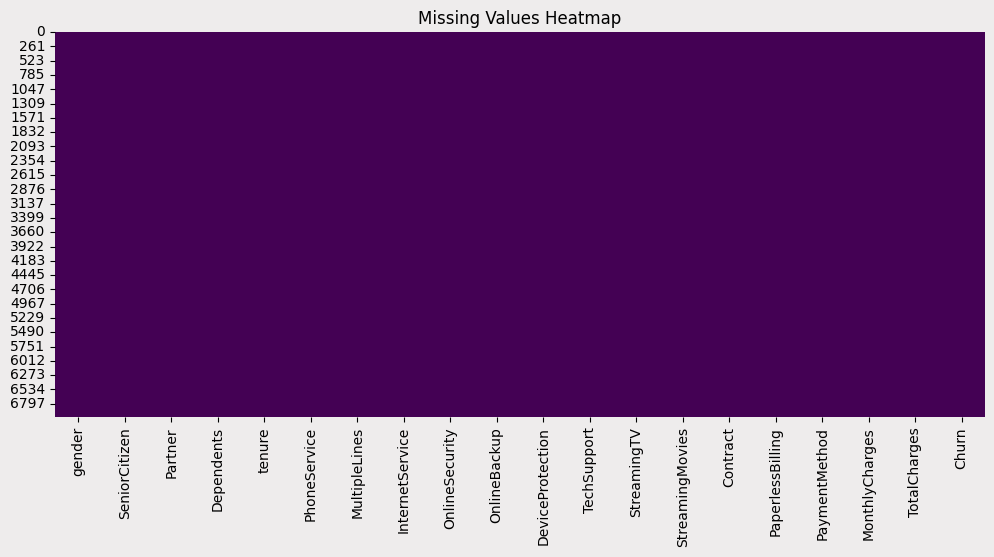

In [78]:
# Cek Missing Value

plt.figure(figsize=(12, 5),facecolor='#eeecec')
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title("Missing Values Heatmap")
plt.show()

In [79]:
for i in df.columns:
    print(i, df[i].unique())

gender ['Female' 'Male']
SeniorCitizen [0 1]
Partner ['Yes' 'No']
Dependents ['No' 'Yes']
tenure [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26 39]
PhoneService ['No' 'Yes']
MultipleLines ['No phone service' 'No' 'Yes']
InternetService ['DSL' 'Fiber optic' 'No']
OnlineSecurity ['No' 'Yes' 'No internet service']
OnlineBackup ['Yes' 'No' 'No internet service']
DeviceProtection ['No' 'Yes' 'No internet service']
TechSupport ['No' 'Yes' 'No internet service']
StreamingTV ['No' 'Yes' 'No internet service']
StreamingMovies ['No' 'Yes' 'No internet service']
Contract ['Month-to-month' 'One year' 'Two year']
PaperlessBilling ['Yes' 'No']
PaymentMethod ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
MonthlyCharges [29.85 56.95 53.85 ... 63.1  44.2  78.7 ]
TotalCharges [  29.85 1889.5   

# Data Preprocessing

Splitting Dataset

In [139]:
from sklearn.model_selection import train_test_split
X = df.drop(columns=['Churn'])
y = df['Churn'].map({'No': 0, 'Yes': 1})
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

Scaling dengan MinMaxScaler

In [140]:
from sklearn.preprocessing import MinMaxScaler

num_cols = df.select_dtypes(include=['number']).columns.tolist()

scaler = MinMaxScaler()
X_train[num_cols] = scaler.fit_transform(X_train[num_cols])
X_test[num_cols] = scaler.transform(X_test[num_cols])


Encoding dengan One Hot Encoder

In [141]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

categorical_cols = [
    'gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines',
    'InternetService', 'OnlineSecurity', 'OnlineBackup',
    'DeviceProtection', 'TechSupport', 'StreamingTV',
    'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod'
]

numerical_cols = ['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges']

encoder = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore', sparse_output=False), categorical_cols),
        ('num', 'passthrough', numerical_cols)
    ]
)

encoded_data = encoder.fit_transform(X_train)
X_test = encoder.transform(X_test)

encoded_df = pd.DataFrame(encoded_data, columns=encoder.get_feature_names_out())
X_test = pd.DataFrame(X_test, columns=encoder.get_feature_names_out())
encoded_df


,cat__gender_Female,cat__gender_Male,cat__Partner_No,cat__Partner_Yes,cat__Dependents_No,cat__Dependents_Yes,cat__PhoneService_No,cat__PhoneService_Yes,cat__MultipleLines_No,cat__MultipleLines_No phone service,...,cat__PaperlessBilling_No,cat__PaperlessBilling_Yes,cat__PaymentMethod_Bank transfer (automatic),cat__PaymentMethod_Credit card (automatic),cat__PaymentMethod_Electronic check,cat__PaymentMethod_Mailed check,num__SeniorCitizen,num__tenure,num__MonthlyCharges,num__TotalCharges
0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.901408,0.759601,0.699279
1,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.352113,0.173067,0.115820
2,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.943662,0.716209,0.724538
3,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.028169,0.657357,0.024954
4,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.676056,0.221945,0.236782
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5620,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,...,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.901408,0.524190,0.523471
5621,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.197183,0.567581,0.130239
5622,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.492958,0.743142,0.387774
5623,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.126761,0.473815,0.073996


Churn
No     4130
Yes    1495
Name: count, dtype: int64


<Figure size 1000x600 with 0 Axes>

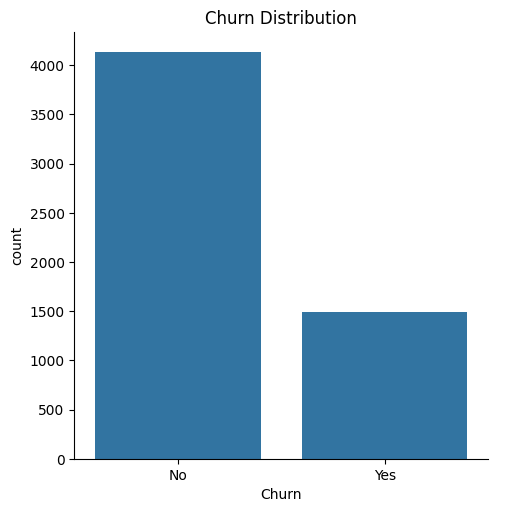

In [153]:
# Concat dengan kolom Churn
final_df = pd.concat([
    y_train,
    encoded_df.reset_index(drop=True)        
], axis=1)

final_df['Churn'] = final_df['Churn'].map({0:'No', 1:'Yes'})
print(final_df['Churn'].value_counts())
plt.figure(figsize=(10, 6))
sns.catplot(x='Churn', data=final_df, kind='count')
plt.title('Churn Distribution')
plt.show()

Sampling untuk menangani Class Imbalance

Churn
0    1495
1    1495
Name: count, dtype: int64


<Figure size 1000x600 with 0 Axes>

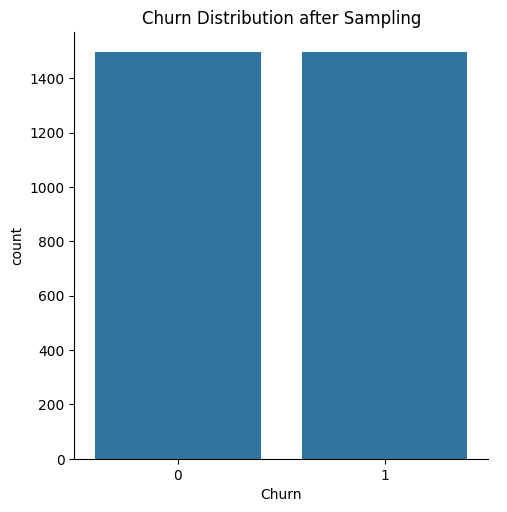

In [175]:
from imblearn.over_sampling import SMOTE,SMOTEN,RandomOverSampler,ADASYN
from imblearn.combine import SMOTEENN,SMOTETomek
from imblearn.under_sampling import RandomUnderSampler

sampling_method = RandomUnderSampler(sampling_strategy=1.0,random_state=random_state)

X_sampled,y_sampled=sampling_method.fit_resample(encoded_df,y_train)
print(y_sampled.value_counts())
plt.figure(figsize=(10, 6))
sns.catplot(x='Churn', data=pd.DataFrame(X_sampled,y_sampled), kind='count')
plt.title('Churn Distribution after Sampling')
plt.show()

In [176]:
for i in final_df.columns:
    print(i, final_df[i].unique())

Churn ['No' 'Yes' nan]
cat__gender_Female [ 1. nan  0.]
cat__gender_Male [ 0. nan  1.]
cat__Partner_No [ 1. nan  0.]
cat__Partner_Yes [ 0. nan  1.]
cat__Dependents_No [ 1. nan  0.]
cat__Dependents_Yes [ 0. nan  1.]
cat__PhoneService_No [ 0. nan  1.]
cat__PhoneService_Yes [ 1. nan  0.]
cat__MultipleLines_No [ 0. nan  1.]
cat__MultipleLines_No phone service [ 0. nan  1.]
cat__MultipleLines_Yes [ 1. nan  0.]
cat__InternetService_DSL [ 1. nan  0.]
cat__InternetService_Fiber optic [ 0. nan  1.]
cat__InternetService_No [ 0. nan  1.]
cat__OnlineSecurity_No [ 0. nan  1.]
cat__OnlineSecurity_No internet service [ 0. nan  1.]
cat__OnlineSecurity_Yes [ 1. nan  0.]
cat__OnlineBackup_No [ 1. nan  0.]
cat__OnlineBackup_No internet service [ 0. nan  1.]
cat__OnlineBackup_Yes [ 0. nan  1.]
cat__DeviceProtection_No [ 0. nan  1.]
cat__DeviceProtection_No internet service [ 0. nan  1.]
cat__DeviceProtection_Yes [ 1. nan  0.]
cat__TechSupport_No [ 0. nan  1.]
cat__TechSupport_No internet service [ 0. nan 

# Splitting & Build Model

Scaling & Splitting Dataset

In [181]:
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
import joblib
import os
import numpy as np

os.makedirs('models', exist_ok=True)

Hyperparameter & Classifier Tuning

In [182]:
classifiers = {
    'rf': RandomForestClassifier(random_state=random_state),
    'svm': SVC(probability=True, random_state=random_state),
    'xgb': XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=random_state)
}

param_grid = [
    {
        'clf': [classifiers['rf']],
        'clf__n_estimators': [100, 200],
        'clf__max_depth': [None, 10, 20],
        'clf__min_samples_split': [2, 5, 10],
        'clf__min_samples_leaf': [1, 2, 5],
        'clf__bootstrap': [True, False],
        'clf__class_weight': ['balanced', {0: 1, 1: 2}, {0: 2, 1: 1}]
    },
    {
        'clf': [classifiers['svm']],
        'clf__C': [0.1, 1, 10],
        'clf__kernel': ['linear', 'rbf'],
        'clf__gamma': ['scale', 'auto']
    },
    {
        'clf': [classifiers['xgb']],
        'clf__max_depth': [3, 6],
        'clf__learning_rate': [0.05, 0.1],
        'clf__subsample': [0.7, 0.8],
        'clf__colsample_bytree': [0.7, 0.8],
        'clf__reg_alpha': [0, 0.1],
        'clf__reg_lambda': [1, 2] 
    }
]

pipeline = Pipeline([
    ('clf', classifiers['rf'])
])

cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=random_state)

grid_search = GridSearchCV(
    estimator=pipeline,
    param_grid=param_grid,
    cv=cv,
    scoring='accuracy',
    n_jobs=-1,
    verbose=1
)

grid_search.fit(X_sampled, y_sampled)

print("Best Estimator:", grid_search.best_estimator_)
print("Best Parameters:", grid_search.best_params_)
print("Best CV Accuracy:", grid_search.best_score_)

os.makedirs('models', exist_ok=True)
joblib.dump(grid_search.best_estimator_, 'models/best_model.pkl')
joblib.dump(grid_search, 'models/grid_search.pkl')

Fitting 10 folds for each of 400 candidates, totalling 4000 fits
Best Estimator: Pipeline(steps=[('clf',
                 XGBClassifier(base_score=None, booster=None, callbacks=None,
                               colsample_bylevel=None, colsample_bynode=None,
                               colsample_bytree=0.7, device=None,
                               early_stopping_rounds=None,
                               enable_categorical=False, eval_metric='logloss',
                               feature_types=None, feature_weights=None,
                               gamma=None, grow_policy=None,
                               importance_type=None,
                               interaction_constraints=None, learning_rate=0.1,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=3, max_leaves=None,
                               min_child_weight=None, missing

['models/grid_search.pkl']

In [184]:
import joblib
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

# Load pipeline
best_pipeline = joblib.load('models/best_model.pkl')
gs = joblib.load("models/grid_search.pkl")

if isinstance(best_pipeline.named_steps['clf'], XGBClassifier):
    rf_model = best_pipeline.named_steps['clf']

y_train_pred = rf_model.predict(X_sampled)
y_pred = rf_model.predict(X_test)

print("=== MODEL ORIGINAL ===")
print(f"Train Accuracy: {accuracy_score(y_sampled, y_train_pred):.4f}")
print(f"Test Accuracy:  {accuracy_score(y_test, y_pred):.4f}")
mean_cv_score = gs.cv_results_['mean_test_score'][gs.best_index_]
std_cv_score = gs.cv_results_['std_test_score'][gs.best_index_]

print(f"Cross Validation Accuracy: {mean_cv_score:.4f} ± {std_cv_score:.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

=== MODEL ORIGINAL ===
Train Accuracy: 0.7993
Test Accuracy:  0.7306
Cross Validation Accuracy: 0.7699 ± 0.0379

Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.70      0.79      1033
           1       0.50      0.80      0.61       374

    accuracy                           0.73      1407
   macro avg       0.70      0.75      0.70      1407
weighted avg       0.80      0.73      0.75      1407



In [185]:
importances_rf = rf_model.feature_importances_
importance_df = pd.DataFrame({
    'feature': X_sampled.columns,
    'importance': importances_rf
}).sort_values('importance', ascending=False)

In [186]:
X_test

,cat__gender_Female,cat__gender_Male,cat__Partner_No,cat__Partner_Yes,cat__Dependents_No,cat__Dependents_Yes,cat__PhoneService_No,cat__PhoneService_Yes,cat__MultipleLines_No,cat__MultipleLines_No phone service,...,cat__PaperlessBilling_No,cat__PaperlessBilling_Yes,cat__PaymentMethod_Bank transfer (automatic),cat__PaymentMethod_Credit card (automatic),cat__PaymentMethod_Electronic check,cat__PaymentMethod_Mailed check,num__SeniorCitizen,num__tenure,num__MonthlyCharges,num__TotalCharges
0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.816901,0.574065,0.521988
1,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.084507,0.600000,0.058176
2,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.746479,0.016958,0.122392
3,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.014085,0.022444,0.002296
4,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.985915,0.865337,0.869628
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1402,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,...,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.154930,0.265337,0.058337
1403,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.352113,0.273317,0.130187
1404,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.028169,0.010474,0.005822
1405,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.507042,0.220948,0.158326


=== THRESHOLD EVALUATION RESULTS ===
   Threshold  Num_Features  Test_Accuracy  CV_Accuracy_Mean  CV_Accuracy_Std
0      0.005            36       0.722104          0.735786         0.034628
1      0.010            20       0.720682          0.736120         0.034610
2      0.015            12       0.696517          0.724415         0.036917
3      0.020             9       0.709311          0.733779         0.028070
4      0.025             9       0.709311          0.733779         0.028070
5      0.030             6       0.729922          0.752174         0.030302


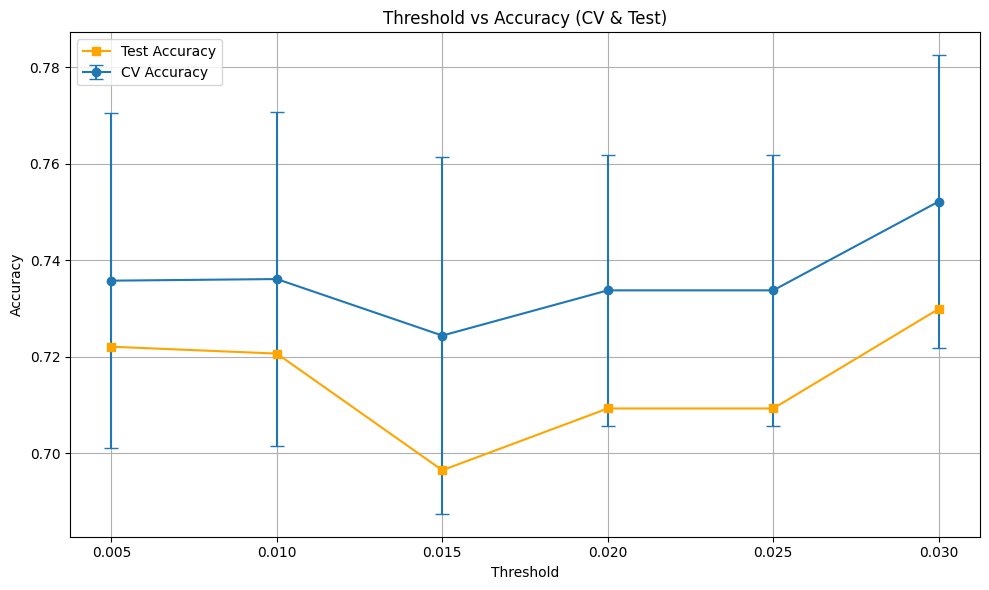

In [187]:
thresholds = [0.005, 0.01, 0.015, 0.02, 0.025, 0.03]

results = []

cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

for t in thresholds:
    selected = importance_df[importance_df['importance'] >= t]['feature']
    if len(selected) < 2:
        continue

    X_train_sel = X_sampled[selected]
    X_test_sel = X_test[selected]

    rf = RandomForestClassifier(random_state=42)

    rf.fit(X_train_sel, y_sampled)
    y_pred_sel = rf.predict(X_test_sel)
    test_acc = accuracy_score(y_test, y_pred_sel)

    cv_scores = cross_val_score(rf, X_train_sel, y_sampled, cv=cv, scoring='accuracy', n_jobs=-1)
    cv_mean = cv_scores.mean()
    cv_std = cv_scores.std()

    results.append({
        'Threshold': t,
        'Num_Features': len(selected),
        'Test_Accuracy': test_acc,
        'CV_Accuracy_Mean': cv_mean,
        'CV_Accuracy_Std': cv_std
    })

results_df = pd.DataFrame(results)

print("=== THRESHOLD EVALUATION RESULTS ===")
print(results_df)

plt.figure(figsize=(10, 6))
plt.errorbar(results_df['Threshold'], results_df['CV_Accuracy_Mean'],
             yerr=results_df['CV_Accuracy_Std'], fmt='-o', capsize=5, label='CV Accuracy')
plt.plot(results_df['Threshold'], results_df['Test_Accuracy'], '-s', label='Test Accuracy', color='orange')
plt.xlabel("Threshold")
plt.ylabel("Accuracy")
plt.title("Threshold vs Accuracy (CV & Test)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

=== FEATURE IMPORTANCE ANALYSIS ===

Features with importance >= 0.015: 12
Features to drop: 33
Important Features: 
                                feature  importance
32         cat__Contract_Month-to-month    0.380623
14               cat__OnlineSecurity_No    0.069000
12     cat__InternetService_Fiber optic    0.058375
23                  cat__TechSupport_No    0.056277
11             cat__InternetService_DSL    0.044389
34               cat__Contract_Two year    0.038525
39  cat__PaymentMethod_Electronic check    0.027920
28                 cat__StreamingTV_Yes    0.026378
31             cat__StreamingMovies_Yes    0.025753
42                          num__tenure    0.019741
33               cat__Contract_One year    0.017546
5                   cat__Dependents_Yes    0.016612

Threshold: 0.015
Original features: 45
Selected features: 12
=== RETRAINING MODEL SETELAH FEATURE SELECTION ===
Train Accuracy: 0.7893
Test Accuracy:  0.7335
Cross Validation Accuracy: 0.7649 ± 0.0363

Clas

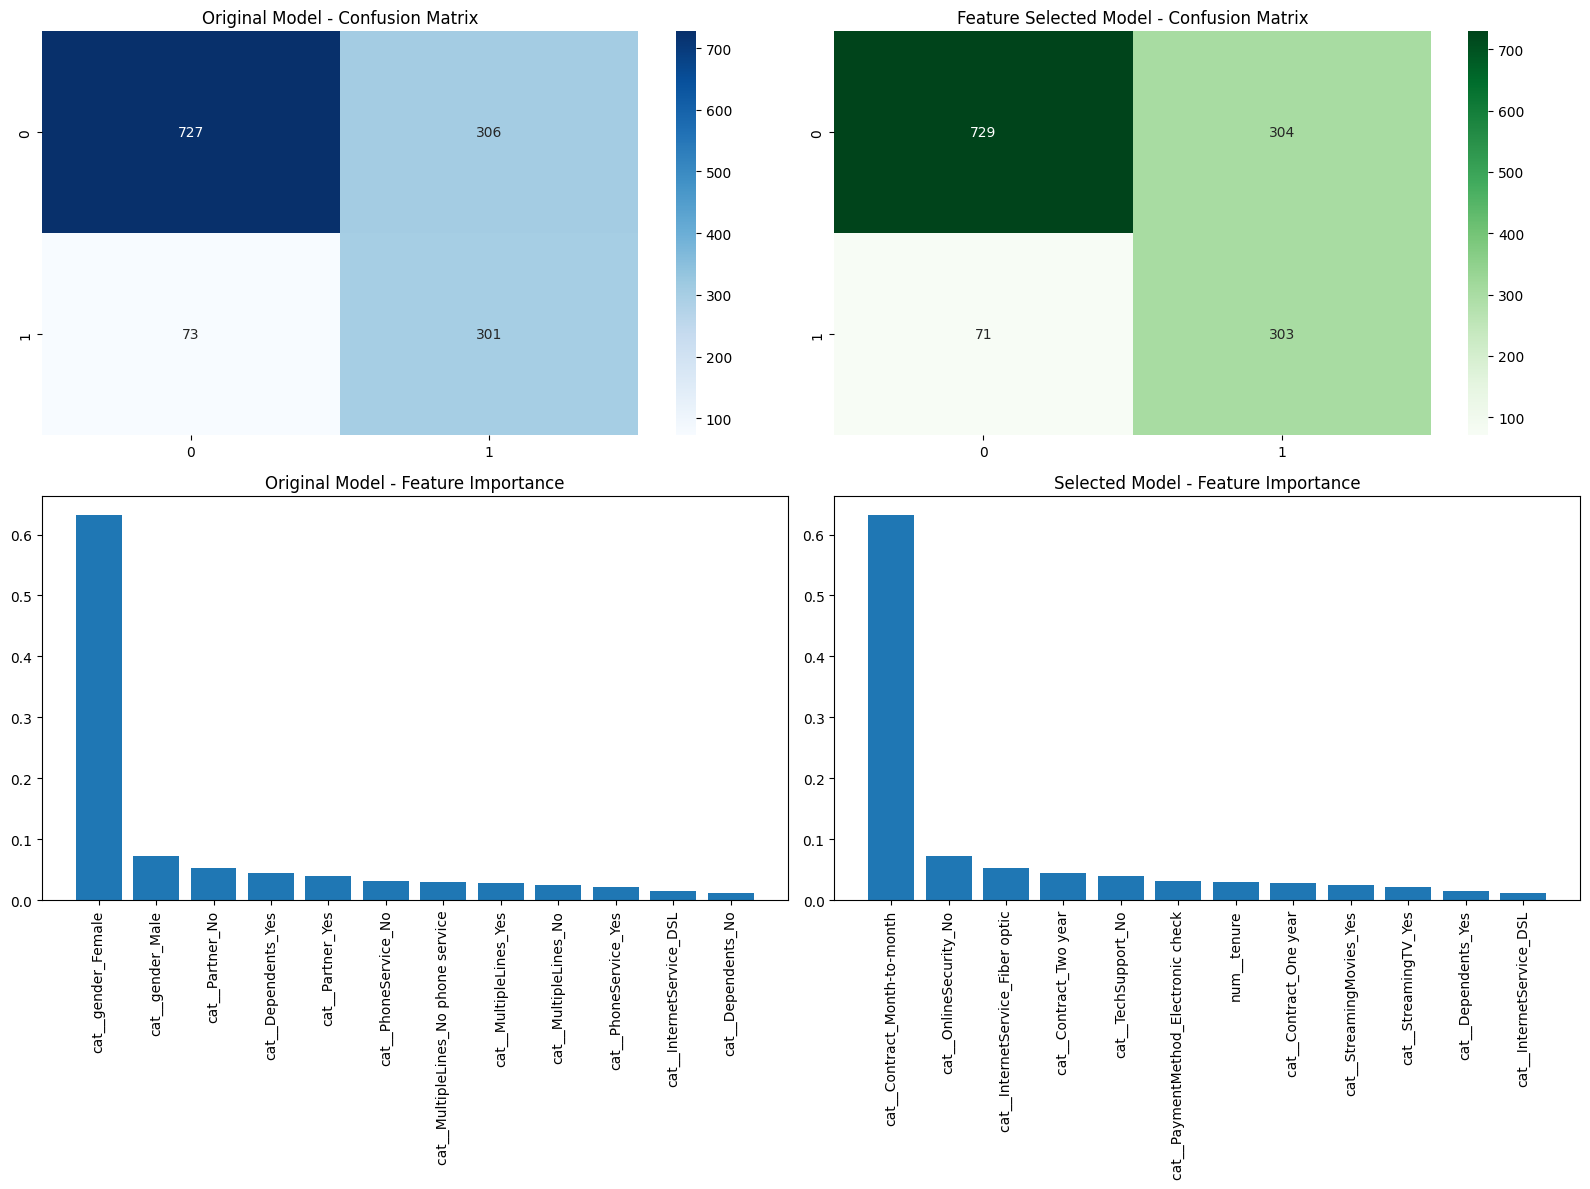


=== SUMMARY ===
Original Model Accuracy: 0.7306
Selected Model Accuracy: 0.7335
Feature reduction: 45 -> 12 (73.3% reduction)


In [188]:
print("=== FEATURE IMPORTANCE ANALYSIS ===")

threshold = 0.015 
important_features = importance_df[importance_df['importance'] >= threshold]['feature'].tolist()

print(f"\nFeatures with importance >= {threshold}: {len(important_features)}")
print(f"Features to drop: {len(X_sampled.columns) - len(important_features)}")
print(f"Important Features: \n{importance_df[importance_df['importance'] >= threshold]}")

X_train_selected = X_sampled[important_features]
X_test_selected = X_test[important_features]

print(f'\nThreshold: {threshold}')
print(f"Original features: {X_sampled.shape[1]}")
print(f"Selected features: {X_train_selected.shape[1]}")

print("=== RETRAINING MODEL SETELAH FEATURE SELECTION ===")
rf_model_selected = rf_model

rf_model_selected.fit(X_train_selected, y_sampled)

y_train_pred_selected = rf_model_selected.predict(X_train_selected)
y_pred_selected = rf_model_selected.predict(X_test_selected)

train_accuracy_selected = accuracy_score(y_sampled, y_train_pred_selected)
test_accuracy_selected = accuracy_score(y_test, y_pred_selected)

print(f"Train Accuracy: {train_accuracy_selected:.4f}")
print(f"Test Accuracy:  {test_accuracy_selected:.4f}")

# Cross Validation untuk model baru
if 'X_sampled' in locals() and 'y_sampled' in locals():
    X_sampled_selected = X_sampled[important_features]
    skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
    cv_scores_selected = cross_val_score(rf_model_selected, X_sampled_selected, y_sampled, cv=skf, scoring='accuracy')
    print(f"Cross Validation Accuracy: {cv_scores_selected.mean():.4f} ± {cv_scores_selected.std():.4f}")

print("\nClassification Report (Selected Features):")
print(classification_report(y_test, y_pred_selected))

# Plot 2 x 2
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# Confusion Matrix - Original Model
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues', ax=axes[0,0])
axes[0,0].set_title('Original Model - Confusion Matrix')

# Confusion Matrix - Selected Features Model
sns.heatmap(confusion_matrix(y_test, y_pred_selected), annot=True, fmt='d', cmap='Greens', ax=axes[0,1])
axes[0,1].set_title('Feature Selected Model - Confusion Matrix')

importances_rf = rf_model.feature_importances_

# Feature Importance - Original Model 
sorted_idx = np.argsort(importances_rf)[::-1]
sorted_importances = importances_rf[sorted_idx]
sorted_features = X_sampled.columns[sorted_idx]

axes[1, 0].bar(range(len(sorted_idx)), sorted_importances, tick_label=sorted_features)
axes[1, 0].set_xticks(range(len(sorted_idx)))
axes[1, 0].set_xticklabels(sorted_features, rotation=90)
axes[1, 0].set_title('Original Model - Feature Importance')

# Feature Importance - Selected Features Model
importances_selected = rf_model_selected.feature_importances_
sorted_idx_selected = np.argsort(importances_selected)[::-1]
sorted_features_selected = [important_features[i] for i in sorted_idx_selected]

axes[1, 1].bar(range(len(importances_selected)), importances_selected[sorted_idx_selected],
               tick_label=sorted_features_selected)
axes[1, 1].set_xticks(range(len(importances_selected)))
axes[1, 1].set_xticklabels(sorted_features_selected, rotation=90)
axes[1, 1].set_title('Selected Model - Feature Importance')

plt.tight_layout()
plt.show()

# Summary Model
print(f"\n=== SUMMARY ===")
print(f"Original Model Accuracy: {accuracy_score(y_test, y_pred):.4f}")
print(f"Selected Model Accuracy: {accuracy_score(y_test, y_pred_selected):.4f}")
print(f"Feature reduction: {X_sampled.shape[1]} -> {X_train_selected.shape[1]} ({((X_sampled.shape[1] - X_train_selected.shape[1]) / X_sampled.shape[1] * 100):.1f}% reduction)")

# Save model baru (jika performa lebih bagus)
if test_accuracy_selected >= accuracy_score(y_test, y_pred) * 0.95:
    joblib.dump((rf_model_selected, important_features), "models/best_model_selected_features.pkl")
